In [2]:
from torchvision.datasets import VisionDataset
from typing import Any, Callable, Dict, List, Optional, Tuple
import os

from tqdm import tqdm
import sys
from pathlib import Path
import requests

from skimage import io, transform
import matplotlib.pyplot as plt

In [3]:
import tarfile

In [49]:
class NotMNIST(VisionDataset):
    resource_url = "http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz"
    
    def __init__(
        self,
        root: str,
        train: bool = True,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        download : bool = False,
    ) -> None:
        super(NotMNIST, self).__init__(root, transform=transform,
                                       target_transform=target_transform)
        if not self._check_exists():
            self.download()
            
        if download:
            self.download()
        
        self.data, self.targets = self._load_data()
        
        def __len(self):
            return len(self.data)
        
    def __getitem__(self, index):
        image_name = self.data[index]
        image = io.imread(image_name)
        label = self.targets[index]
            
        if self.transform:
            image = self.transform(image)
        return image, label
        
    def _load_data(self):
        filepath = self.image_folder
        data = []
        targets = []
            
        for target in os.listdir(filepath):
            filenames = [os.path.abspath(
                os.path.join(filepath, target, x)) for x in os.listdir( os.path.join(filepath,target))]
                
            targets.extend([target] * len(filenames))
            data.extend(filenames)
        return data, targets
    @property
    def raw_folder(self) -> str:
        return os.path.join(self.root, self.__class__.__name__, 'raw')
        
    @property
        
    def image_folder(self) -> str:
        return os.path.join(self.root, 'notMNIST_large')
        
    def download(self) -> None:
        os.makedirs(self.raw_folder, exist_ok=True)
        fname = self.resource_url.split("/")[-1]
        chunk_size = 1024
            
        user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'
        
        filesize = int(requests.head(
            self.resource_url,
            headers={
                "User-Agent" : user_agent
                }).headers["Content-Length"])
            
        with requests.get(self.resource_url, stream=True, headers={
            "User-Agent" :user_agent}) as r, open(
            os.path.join(self.raw_folder, fname), "wb") as f , tqdm(
            unit="8",
            unit_scale=True,
            unit_divisor=1024,
            total=filesize,
            file=sys.stdout,
            desc = fname
        ) as progress:
            for chunk in r.iter_content(chunk_size=chunk_size):
                datasize = f.write(chunk)
                progress.update(datasize)
                    
        self._extract_file(os.path.join(self.raw_folder, fname), target_path=self.root)
            
        
    def _extract_file(self, fname, target_path) -> None: # 압축해제 
        if fname.endswith("tar.gz"):
                tag = 'r:gz'
        elif fname.endswith("tar"):
            tag = "r:"
        tar = tarfile.open(fname, tag)
        tar.extractall(path=target_path)
        tar.close()
                
    def _check_exists(self) -> bool:
        return os.path.exists(self.raw_folder)
                
                    
        

In [50]:
dataset = NotMNIST("data2", download=True)

notMNIST_large.tar.gz: 100%|████████████████████████████████████████████████████████| 236M/236M [00:20<00:00, 11.9M8/s]


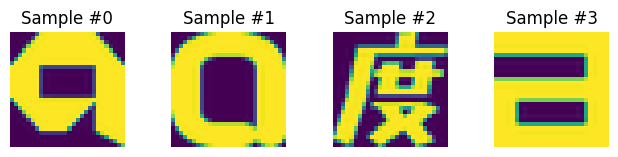

In [51]:
fig = plt.figure()

for i in range(8):
    sample = dataset[i]
    
    ax = plt.subplot(1, 4, i + 1 ) 
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    
    plt.imshow(sample[0])
    
    if i == 3:
        plt.show()
        break

### Data augmentation

In [59]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
        				 std = [0.229, 0.224, 0.225])
    ])


In [61]:
dataset = NotMNIST("data", download = False )
dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

notMNIST_large.tar.gz: 100%|████████████████████████████████████████████████████████| 236M/236M [00:26<00:00, 9.36M8/s]


NotImplementedError: 

In [62]:
train_features , train_labels = next(iter(datset_loader))

NameError: name 'datset_loader' is not defined

In [63]:
train_features.shape

NameError: name 'train_features' is not defined